In [46]:
import numpy as np
import sklearn
import pandas as pd
import json
import os

from fastai.text import *
from fastai import *

In [9]:
!ls data/

08dfcc82-274c-41b6-a013-e80d70f3c57e.json
0d981498-97b9-4c2c-9ef8-b320feed0347.json
132d3064-6b74-477c-baf3-ac2a1017d8fe.json
146e0475-5cbf-4e6b-baf9-f1d76db99e8a.json
15c7e4c1-90c5-4ec5-af75-f70579790656.json
163354b9-3bc0-42a9-b58e-c5c3c611641c.json
2413aac9-caa5-4aa9-94f6-77b591958bb4.json
24e4523c-6f50-4538-83ef-3766c10717e0.json
2810fd25-7c39-4f45-a7e4-b95bc75baf72.json
2a0a1cf7-29c1-4459-ab85-b57ed06386a7.json
2b3b804b-dd12-4f0e-9fc0-8687b627534c.json
35af56f5-ded2-47dd-9924-74ef684341b0.json
38b736ee-3cd1-4138-ae75-b6467b18ad20.json
4bb3619e-4fc3-457a-ade0-45f0eea586fe.json
513b82a9-d62a-4a98-a613-26abd544a51f.json
517bfe13-064f-4f95-b724-11cd98aa35ff.json
52e7b79f-5906-4546-9409-e2881c9a560a.json
557b5a6e-9723-492b-98d9-7dd46ad7932e.json
5638e570-f777-4e46-9a9e-459a2a540802.json
56ce6ed6-3ed7-4e89-a93f-809c57b55dc8.json
574856c7-6aa3-4b7b-98c2-c78ca6fe1782.json
57a45e8c-48b9-4cf1-9483-0d80ab65cd22.json
5b7c7f00-84f8-461d-bfb5-55a5ef8e34f1.json
5dc3f6f1-3ad4-4c42-9697-b0971cd121

In [15]:
one_file = Path('/home/jupyter/insight_project/basilica-insight-project/data/08dfcc82-274c-41b6-a013-e80d70f3c57e.json')

In [16]:
with open(one_file) as f:
    data = json.load(f)

In [24]:
data['data_points'][0]['body']

"I don't really think R53 counts as AWS lock-in. If you move to another cloud platform you can move DNS/registrar pretty easily."

In [25]:
data['data_points'][0]['label']

1

In [26]:
data['data_points'][0]['source']

'reddit'

In [27]:
for one_data in data['data_points']:
    print(one_data['body'])
    print(one_data['label'])
    print(one_data['source'])
    break

I don't really think R53 counts as AWS lock-in. If you move to another cloud platform you can move DNS/registrar pretty easily.
1
reddit


In [69]:
#Export
def convert_json_to_csv(path):
    #use path to grab json format Basilica data
    #return csv file
    #body,label,source
    body, label, source = [], [], []
    with open(path) as file:
        data = json.load(file)
    for item in data['data_points']:
        body.append(item['body'])
        label.append(item['label'])
        source.append(item['source'])
    df = pd.DataFrame(list(zip(body, label, source)),
                     columns = ['Body', 'Label', 'Source'])
    
    if not os.path.exists(path.parent/'csv'):
        os.makedirs(path.parent/'csv')
    dest = path.parent/'csv'
    filename = Path(path.name).stem + '.csv'
    df.to_csv(dest/filename,index=False)
    print(f'convert {filename} to csv')

In [75]:
for file in file_path:
    convert_json_to_csv(file)

convert 841123a9-67ad-43aa-822b-64d7d82a6692.csv to csv
convert d1e64b34-54ae-466c-a187-27933492ccc1.csv to csv
convert 72f177e3-bbc2-45b2-8dce-46df70c6f66f.csv to csv
convert 35af56f5-ded2-47dd-9924-74ef684341b0.csv to csv
convert ed91c398-31c6-437f-a9d1-462e3ccfb6fa.csv to csv
convert b6ff8ecd-eaf4-4fd6-a92b-73e8bbe50368.csv to csv
convert 73b0096a-b9e0-419e-8e9a-a0f597e4b223.csv to csv
convert 24e4523c-6f50-4538-83ef-3766c10717e0.csv to csv
convert d60fa67b-c7fc-4cc0-a0e8-7b7c90c9ff6a.csv to csv
convert bbfc49fc-e1bd-44ba-823a-8a5261555cf6.csv to csv
convert 88b92105-fff6-4a53-abdf-c6c59bb8409a.csv to csv
convert 62a3e517-c730-41fa-9bb2-99151b354c03.csv to csv
convert 38b736ee-3cd1-4138-ae75-b6467b18ad20.csv to csv
convert 9ac12eaf-92e1-46fa-8ff5-0432fc4f1e4f.csv to csv
convert b2cee617-b985-4ce4-9f85-a75b5134b4d8.csv to csv
convert a837049a-ce51-4cbe-a044-f473509a18c2.csv to csv
convert 68080779-ea49-46a8-ab67-e936e2660b27.csv to csv
convert ac977b20-e439-4dc2-8708-8c6e90db8b2e.csv

In [29]:
df = convert_json_to_csv(one_file)

In [30]:
df.head()

,Body,Label,Source
0,I don't really think R53 counts as AWS lock-in...,1,reddit
1,"Move aside Netlify, I am switching to @zeithq ...",1,twitter
2,... and here is a simple #awscdk (infrastructu...,1,twitter
3,Advance your skillset with this e-book from Pa...,0,twitter
4,08-21 13:43 - 'Which is your favorite Linux De...,1,reddit


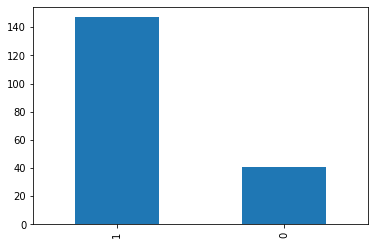

In [32]:
df['Label'].value_counts().plot(kind='bar')

In [33]:
df['Label'].value_counts()

1    147
0     41
Name: Label, dtype: int64

In [34]:
147+41

188

In [36]:
path = Path('/home/jupyter/insight_project/basilica-insight-project/data')
file_path = path.ls()

In [38]:
df = convert_json_to_csv(file_path[0])

In [39]:
df.head()

,Body,Label,Source
0,@desperosolace @yu_malaya I agree! It's ridicu...,1,twitter
1,@yu_malaya it's total BS!!! i hate this so muc...,1,twitter
2,@owedbetter_ I wanted to withdraw my applicati...,1,twitter
3,Good question. My situation was a bit differen...,0,reddit
4,"""Like me, you can also achieve your IELTS band...",0,twitter


In [68]:
Path(file_path[0].name).stem + '.csv'

'841123a9-67ad-43aa-822b-64d7d82a6692.csv'

In [51]:
if not os.path.exists(file_path[0].parent/'csv'):
    print('yes')

In [50]:
!ls {file_path[0].parent/'csv'}

In [70]:
convert_json_to_csv(file_path[0])

convert 841123a9-67ad-43aa-822b-64d7d82a6692.csv to csv


In [76]:
!ls {path/'csv'}

08dfcc82-274c-41b6-a013-e80d70f3c57e.csv
0d981498-97b9-4c2c-9ef8-b320feed0347.csv
132d3064-6b74-477c-baf3-ac2a1017d8fe.csv
146e0475-5cbf-4e6b-baf9-f1d76db99e8a.csv
15c7e4c1-90c5-4ec5-af75-f70579790656.csv
163354b9-3bc0-42a9-b58e-c5c3c611641c.csv
2413aac9-caa5-4aa9-94f6-77b591958bb4.csv
24e4523c-6f50-4538-83ef-3766c10717e0.csv
2810fd25-7c39-4f45-a7e4-b95bc75baf72.csv
2a0a1cf7-29c1-4459-ab85-b57ed06386a7.csv
2b3b804b-dd12-4f0e-9fc0-8687b627534c.csv
35af56f5-ded2-47dd-9924-74ef684341b0.csv
38b736ee-3cd1-4138-ae75-b6467b18ad20.csv
4bb3619e-4fc3-457a-ade0-45f0eea586fe.csv
513b82a9-d62a-4a98-a613-26abd544a51f.csv
517bfe13-064f-4f95-b724-11cd98aa35ff.csv
52e7b79f-5906-4546-9409-e2881c9a560a.csv
557b5a6e-9723-492b-98d9-7dd46ad7932e.csv
5638e570-f777-4e46-9a9e-459a2a540802.csv
56ce6ed6-3ed7-4e89-a93f-809c57b55dc8.csv
574856c7-6aa3-4b7b-98c2-c78ca6fe1782.csv
57a45e8c-48b9-4cf1-9483-0d80ab65cd22.csv
5b7c7f00-84f8-461d-bfb5-55a5ef8e34f1.csv
5dc3f6f1-3ad4-4c42-9697-b0971cd1218e.csv
5efe0741-7ea8-4f

In [72]:
df_new = pd.read_csv(path/'csv/841123a9-67ad-43aa-822b-64d7d82a6692.csv')
df_new.head()

,Body,Label,Source
0,@desperosolace @yu_malaya I agree! It's ridicu...,1,twitter
1,@yu_malaya it's total BS!!! i hate this so muc...,1,twitter
2,@owedbetter_ I wanted to withdraw my applicati...,1,twitter
3,Good question. My situation was a bit differen...,0,reddit
4,"""Like me, you can also achieve your IELTS band...",0,twitter


# Fin
1. Truned all json files to csv, dropped their embedding
2. json_to_csv will convert Basilica json format file to csv file
3. csv format Body Label Source